In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
adata = pd.read_csv('application_data.csv')
pdata = pd.read_csv('previous_application.csv')

In [3]:
adata.shape

(307511, 122)

In [4]:
pdata.shape

(1670214, 37)

In [5]:
#as the datasets are large so enlargin our display options
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.width', 1000)

In [6]:
adata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
pdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
adata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
adata.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# We will now first analyse the application dataframe and then afterwards we will work on the previous applications dataframe.

In [10]:
adata.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
adata.isnull().sum()/len(adata)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [12]:
#let's convert them into percentage and round off till 2 decimal places
(100*(adata.isnull().sum()/len(adata))).round(2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [13]:
#Now as instructed we will drop the columns which have missing values greater than 50%

In [14]:
adata = adata.loc[:, adata.isnull().mean() <= .50]

In [15]:
adata.shape

(307511, 81)

In [16]:
#we have dropped around 41 columns

In [17]:
#Now as instructed during the live session, we will impute the missing values in columns which have less than 13% missing values

In [18]:
adata.loc[:, adata.isnull().mean() <= .13]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial asso

In [19]:
adata.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [20]:
#as 80% values are unaccompanied so all the missing values can be imputed as Unaccompanied

In [21]:
adata['NAME_TYPE_SUITE'].fillna(adata.NAME_TYPE_SUITE.mode(), inplace=True)

In [22]:
adata.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [23]:
adata.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)

0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [24]:
adata.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)

0.0    0.967909
1.0    0.030858
2.0    0.000748
3.0    0.000218
4.0    0.000128
6.0    0.000075
5.0    0.000038
8.0    0.000019
7.0    0.000008
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [25]:
adata.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)

0.0     0.835488
1.0     0.124617
2.0     0.020249
3.0     0.007485
4.0     0.004045
5.0     0.002263
6.0     0.001290
7.0     0.001120
9.0     0.000774
8.0     0.000696
10.0    0.000496
11.0    0.000447
12.0    0.000289
13.0    0.000271
14.0    0.000150
15.0    0.000132
16.0    0.000086
17.0    0.000053
18.0    0.000023
19.0    0.000011
24.0    0.000004
27.0    0.000004
22.0    0.000004
23.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [26]:
adata.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)

0.0      0.809863
1.0      0.127305
2.0      0.054182
3.0      0.006455
4.0      0.001790
5.0      0.000241
6.0      0.000105
7.0      0.000026
8.0      0.000026
19.0     0.000004
261.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [27]:
adata.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

In [28]:
#we can impute the missing values in these column as 0 

In [29]:
df1=adata.copy()

In [30]:
adata[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]= adata[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK' ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(value=0.0)

In [31]:
adata.AMT_GOODS_PRICE.mean()

538396.2074288895

In [32]:
adata['AMT_GOODS_PRICE'].fillna(adata.AMT_GOODS_PRICE.mean(), inplace=True)

In [33]:
adata.select_dtypes('object').columns 

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE'], dtype='object')

In [34]:
adata.select_dtypes('float').columns 

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [35]:
#Some of the columns could not be float (number of days,number of enquiries, 
#number of family members and number of people in social circle). So we have to convert few of them to integer
adata['DAYS_REGISTRATION'] = adata['DAYS_REGISTRATION'].astype(int,errors='ignore')
adata['CNT_FAM_MEMBERS'] = adata['CNT_FAM_MEMBERS'].astype(int,errors='ignore')
adata['OBS_30_CNT_SOCIAL_CIRCLE'] = adata['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
adata['DEF_30_CNT_SOCIAL_CIRCLE'] = adata['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
adata['DAYS_LAST_PHONE_CHANGE'] = adata['DAYS_LAST_PHONE_CHANGE'].astype(int,errors='ignore')
adata['AMT_REQ_CREDIT_BUREAU_HOUR'] = adata['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int,errors='ignore')


In [36]:
adata.select_dtypes('int64').columns 

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], dtype='object')

In [37]:
#we checked all the float and object type columns and now we are checking for integer type columns

In [38]:
adata.FLAG_DOCUMENT_2.value_counts()

0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64

In [39]:
adata.FLAG_DOCUMENT_3.value_counts()

1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64

In [40]:
adata.FLAG_DOCUMENT_4.value_counts()

0    307486
1        25
Name: FLAG_DOCUMENT_4, dtype: int64

In [41]:
adata.FLAG_DOCUMENT_5.value_counts()

0    302863
1      4648
Name: FLAG_DOCUMENT_5, dtype: int64

In [42]:
cols=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [43]:
def change(adata, cols):
    for x in cols:
        adata.loc[:,x].replace((0, 1), ('N', 'Y'), inplace=True)
    return adata

In [44]:
change(adata,cols)
adata.dtypes.value_counts()

object     45
float64    25
int64       9
int32       2
dtype: int64

In [45]:
#as instructed we should check for outliers in the numerical columns

In [46]:
adata.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120327,-2994.202373,2.152665,2.052463,2.031521,12.063419,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.692794e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910682,0.509034,0.502737,3.265832,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,10.000000,3.924574e-01,0.370650,0.976700,0.166700,0.976700,0.166700,0.976700,0.166700,0.041200,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,12.000000,5.659614e-01,0.535276,0.981600,0.166700,0.981600,0.166700,0.981600,0.166700,0.068800,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,6.636171e-01,0.669057,0.986600,0.333300,0.986600,0.333300,0.986600,0.333300,0.127600,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,8.549997e-01,0.896010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


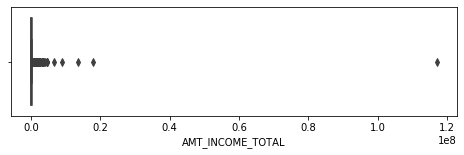

In [47]:
plt.figure(figsize=(8,2))
sns.boxplot(adata.AMT_INCOME_TOTAL)
plt.show()

In [48]:
#clearly an outlier there

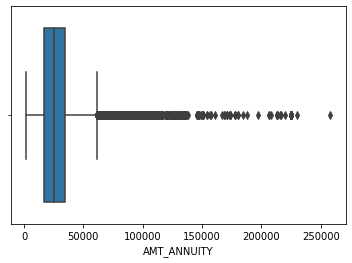

In [49]:
sns.boxplot(adata.AMT_ANNUITY)
plt.show()

In [50]:
#outlier here also

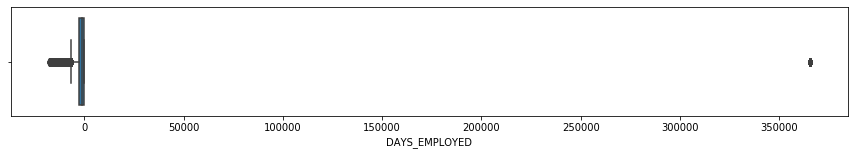

In [51]:
plt.figure(figsize=(15,2))
sns.boxplot(adata.DAYS_EMPLOYED)
plt.show()

In [52]:
#outlier here also

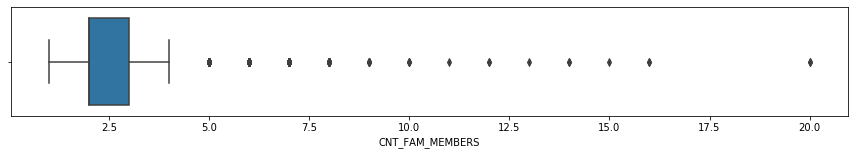

In [53]:
plt.figure(figsize=(15,2))
sns.boxplot(adata.CNT_FAM_MEMBERS)
plt.show()

In [54]:
#outliers here also

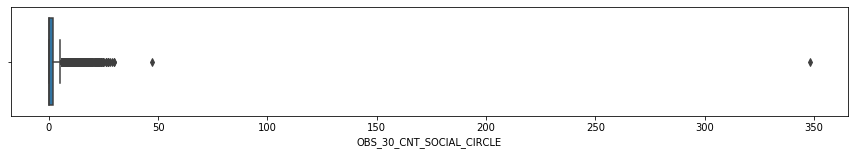

In [55]:

plt.figure(figsize=(15,2))
sns.boxplot(adata.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [56]:
#outlier here also

#Treatment of outliers

In [57]:
adata=adata[adata.AMT_ANNUITY<np.nanpercentile(adata['AMT_ANNUITY'], 99)]
adata=adata[adata.DAYS_EMPLOYED<np.nanpercentile(adata['DAYS_EMPLOYED'], 99)]
adata=adata[adata.AMT_INCOME_TOTAL<np.nanpercentile(adata['AMT_INCOME_TOTAL'], 99)]
adata=adata[adata.CNT_FAM_MEMBERS<np.nanpercentile(adata['CNT_FAM_MEMBERS'], 99)]
adata=adata[adata.OBS_30_CNT_SOCIAL_CIRCLE<np.nanpercentile(adata['OBS_30_CNT_SOCIAL_CIRCLE'], 99)]

In [58]:
#rechecking

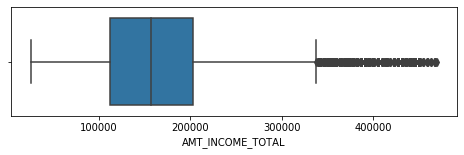

In [59]:
plt.figure(figsize=(8,2))
sns.boxplot(adata.AMT_INCOME_TOTAL)
plt.show()

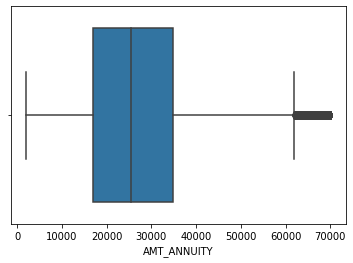

In [60]:
sns.boxplot(adata.AMT_ANNUITY)
plt.show()

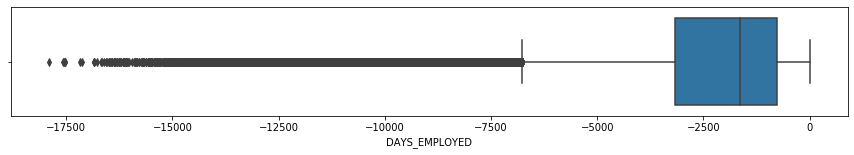

In [61]:
plt.figure(figsize=(15,2))
sns.boxplot(adata.DAYS_EMPLOYED)
plt.show()

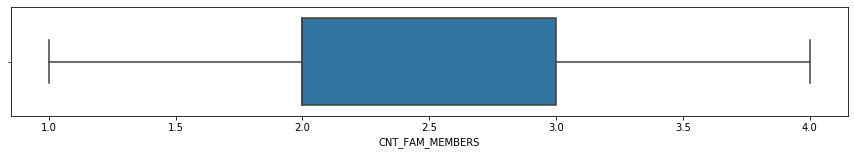

In [62]:
plt.figure(figsize=(15,2))
sns.boxplot(adata.CNT_FAM_MEMBERS)
plt.show()

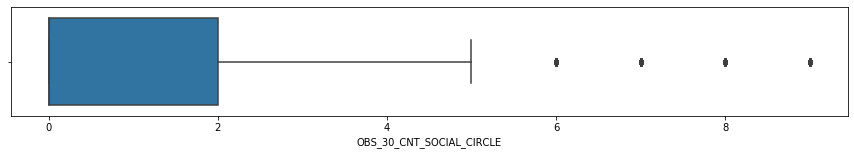

In [63]:
plt.figure(figsize=(15,2))
sns.boxplot(adata.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [65]:
#dealt with some of the outliers here
#now moving on we will try binning some of the columns

In [66]:
df2=adata.copy()

In [67]:
#in binning we will try to put a column into a particular range which will make it easier for analysis

In [68]:
adata.loc[:,'INCOME_RANGE']=pd.qcut(adata.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.20,0.50,0.90,1],
labels=['Low','Medium','High','Very_high'])

In [69]:
adata['INCOME_RANGE'].value_counts()

High         81710
Low          70682
Medium       66628
Very_high    20021
Name: INCOME_RANGE, dtype: int64

In [70]:
#trying to bin another variable
adata.loc[:,'Rating2']=pd.qcut(adata.loc[:,'EXT_SOURCE_2'],q=[0,0.20,0.50,0.90,1],
labels=['Low','Medium','High','Very_high'])

In [71]:
adata['Rating2'].value_counts()

High         95423
Medium       71569
Low          47713
Very_high    23857
Name: Rating2, dtype: int64

In [73]:
adata['AGE'] =adata['DAYS_BIRTH']//-365.25
adata.drop(['DAYS_BIRTH'],axis=1,inplace=True)

In [75]:
adata.AGE.describe()

count    239041.000000
mean         39.949444
std          10.074211
min          20.000000
25%          32.000000
50%          39.000000
75%          48.000000
max          68.000000
Name: AGE, dtype: float64

In [76]:
#Max age is 68 and min age is 20 and average age lies around 40 years
#Now it will be a good time to convert this into a range as age range is a generally good point to analyse

In [77]:
adata['AGE_GROUP']= pd.cut(adata.AGE,bins=np.linspace(20 ,70,num=11))
adata.AGE_GROUP.value_counts()

(35.0, 40.0]    40315
(40.0, 45.0]    37221
(30.0, 35.0]    36611
(25.0, 30.0]    34870
(45.0, 50.0]    31461
(50.0, 55.0]    27076
(20.0, 25.0]    15907
(55.0, 60.0]    11364
(60.0, 65.0]     3716
(65.0, 70.0]      499
Name: AGE_GROUP, dtype: int64

In [78]:
#majority of the applicants lie in the 35-40 years of age

In [79]:
#We will now split the data into two dataframes: Defaulters and non defaulters

In [80]:
#TARGET=0 i.e. NON_DEFAULTERS and TARGET=1 i.e. DEFAULTERS

# We had to check imbalance here but I don't know how to do that so I will do what I remeber the next step to be i.e. splitting the data frame into 2

In [81]:
df3 = adata.copy()

In [82]:
adata_t0 =adata[adata.TARGET==0]
adata_t1=adata[adata.TARGET==1]

In [84]:
## Now we will do the univariate analysis for the categorical columns:

In [88]:
def analysis(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=adata_t0)
    plt.title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=adata_t1)
    plt.title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

In [89]:
#created a function "Analysis" which will help in plotting the columns

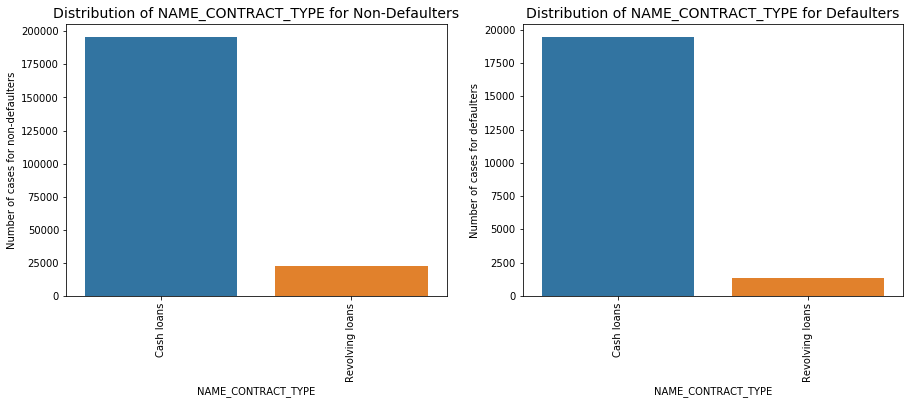

In [90]:
analysis('NAME_CONTRACT_TYPE')

# Inference:Number of people defaulting on Revolving Loans is lesser which means that these type of loans are safer for bansk to give

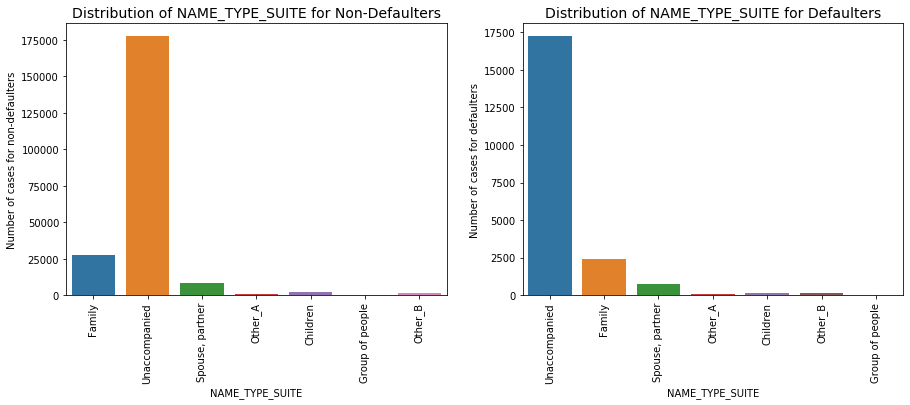

In [92]:
analysis('NAME_TYPE_SUITE')

Inference: People who default on loans have a similar distribution for who accompanied the person when he/she was taking a loan like in non defaulters case  which means this column has no impact on loan default

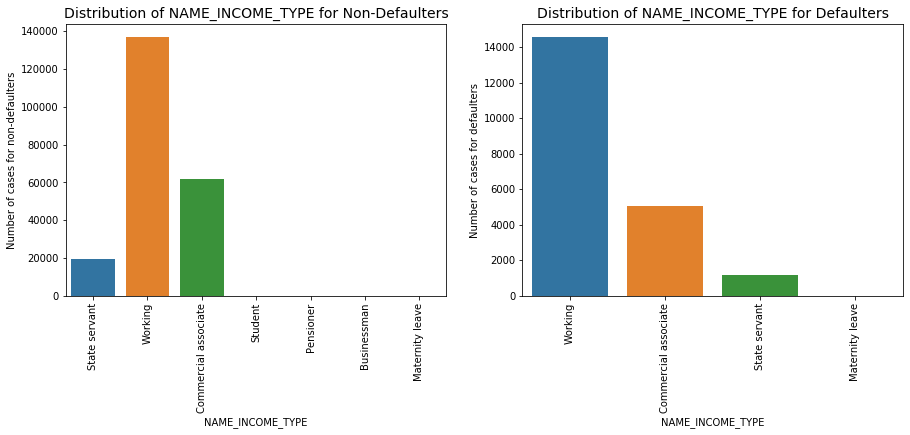

In [93]:
analysis('NAME_INCOME_TYPE')

Inference: Major non defaulters are from working sector

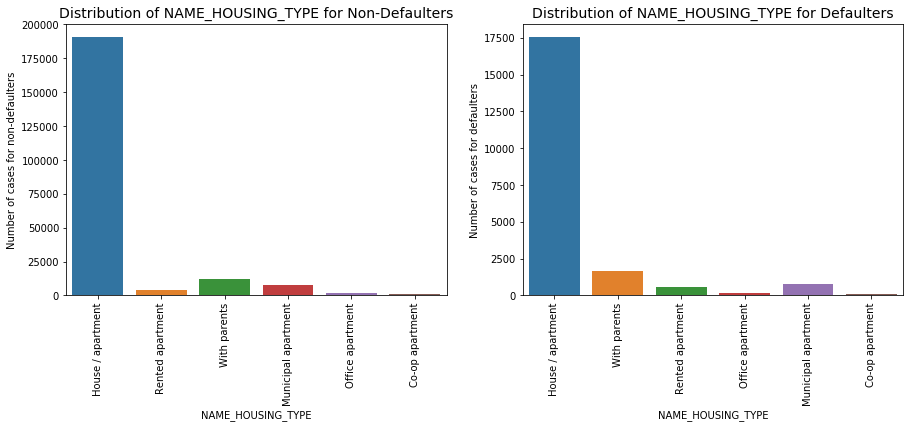

In [94]:
analysis('NAME_HOUSING_TYPE')

Inference: According to the above plots, people who live with parents default more. Maybe due to low salary they have lesser repayment power

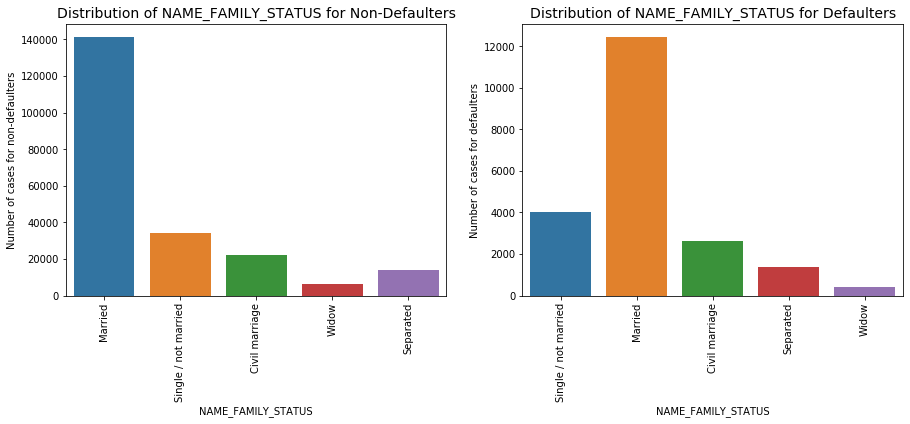

In [95]:
analysis('NAME_FAMILY_STATUS')

Inference:Single/ not married is proportionally higher in dafaulted population as compared to non defaulted population. THis shows that Single applicants have higher defaults.

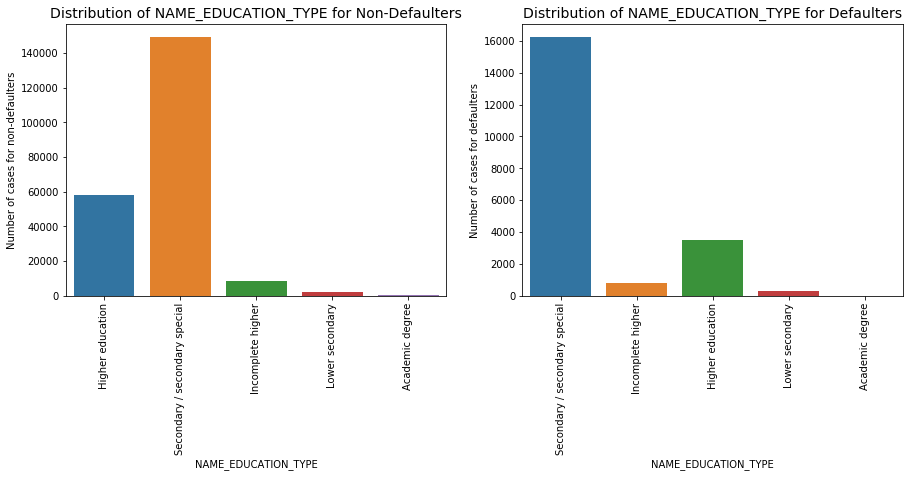

In [96]:
analysis('NAME_EDUCATION_TYPE')

Inference: Higher Education people form a lower proportion of defaulters as compared with non defaulters. This might mean that with better education, they might get better work opportunities which may result in higher salaries and more repayment power

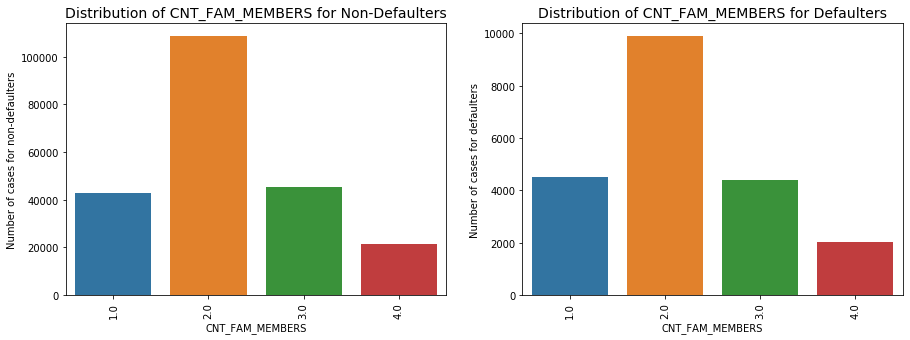

In [97]:
analysis('CNT_FAM_MEMBERS')

Inference:Higher number of children has a slight impact on default rate as with more children comes extra responsibility and lesser repayment power

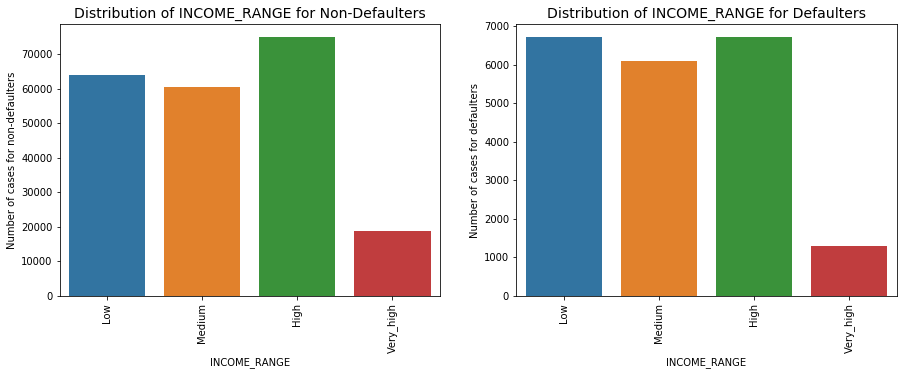

In [98]:
analysis('INCOME_RANGE')

Inference: As expected, Low Income range people have lesser repayment power therefore are more prone to be defaulters

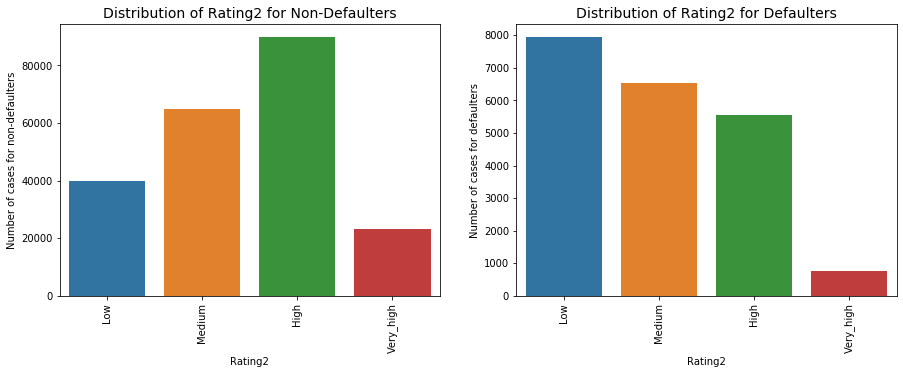

In [100]:
analysis('Rating2')

Inference:People having low rating are mor eprone to be defaulters

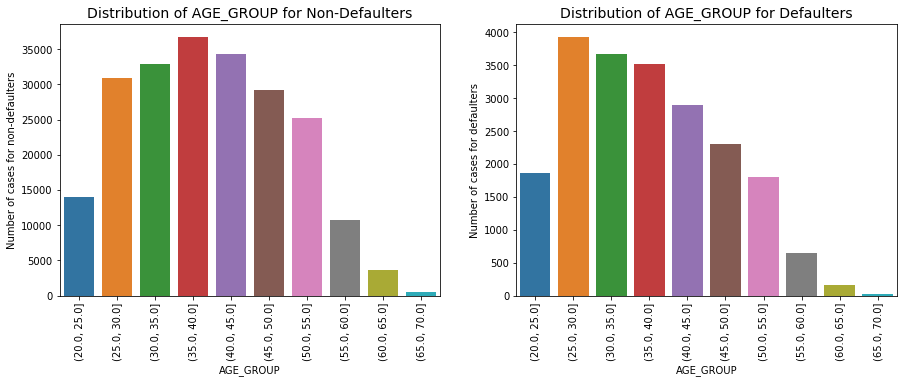

In [101]:
analysis('AGE_GROUP')

Inference:People from the age-group 25-35 years are more prone to be defaulters as they are just starting their careers/families and have additional responsibilities and therefore don't have financial freedom and have less repayment power

In [103]:
#done univariate analysis for 10 columns

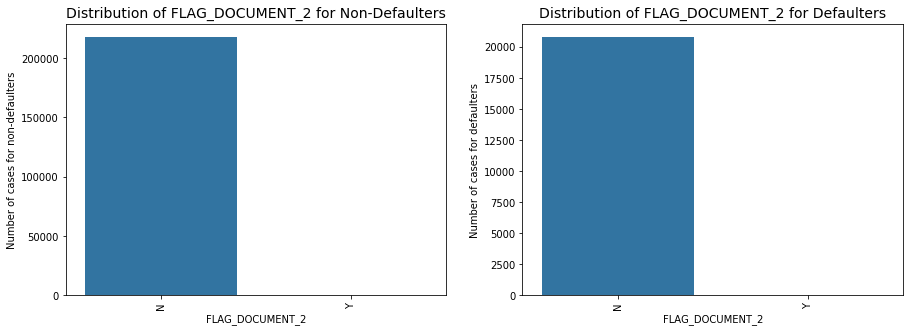

In [104]:
analysis('FLAG_DOCUMENT_2')

Inference: No impact on Loan default

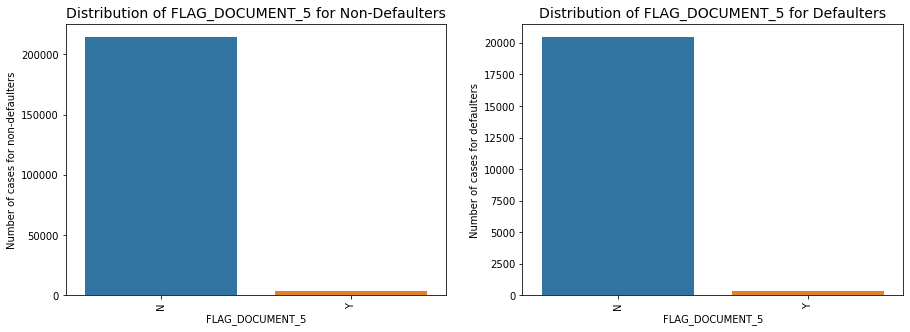

In [105]:
analysis('FLAG_DOCUMENT_5')

Inference: No impact on Loan default. Which means all loan documents have no impact on whether a person will default or not.

In [106]:
#As advised, let's find the correlation between the numerical columns of both the target dataframes

In [107]:
#We have to choose the integer and float columns so that their correlation can be found out

In [108]:
cols_num=list(adata_t0.select_dtypes('int64').columns)
cols_float=list(adata_t0.select_dtypes('float').columns)

cols=cols_num+cols_float

Nondef_num=adata_t0[cols]
Nondef_corr = Nondef_num.corr()
round(Nondef_corr, 3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_EMPLOYED,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,AGE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000,NaN,0.002,0.000,0.001,-0.001,-0.001,-0.001,0.001,0.002,-0.000,0.001,0.000,0.001,0.001,0.002,0.001,0.000,0.003,0.000,0.002,0.000,0.003,0.001,-0.000,0.002,-0.000,0.004,0.000,-0.002,0.001,0.000,0.000,0.002
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.002,NaN,1.000,0.068,-0.117,0.035,0.034,-0.031,-0.253,-0.016,-0.020,-0.011,-0.024,-0.028,0.871,-0.022,-0.013,0.010,-0.013,0.010,-0.013,0.009,-0.013,-0.012,0.023,0.004,0.023,0.003,-0.005,0.002,0.001,-0.016,-0.000,-0.024
DAYS_EMPLOYED,0.000,NaN,0.068,1.000,0.087,-0.018,-0.017,0.022,-0.353,-0.034,-0.088,-0.051,-0.089,0.009,0.032,-0.081,-0.121,-0.001,0.009,-0.001,0.008,-0.001,0.009,0.006,0.001,0.008,0.001,0.010,0.136,0.002,-0.002,-0.030,-0.002,-0.025
DAYS_ID_PUBLISH,0.001,NaN,-0.117,0.087,1.000,0.004,0.002,0.006,-0.111,-0.033,-0.034,-0.024,-0.036,-0.004,-0.107,-0.060,-0.101,-0.001,-0.016,-0.000,-0.016,-0.001,-0.016,-0.015,-0.006,0.009,-0.006,0.011,0.106,-0.003,-0.009,-0.031,-0.015,-0.058
REGION_RATING_CLIENT,-0.001,NaN,0.035,-0.018,0.004,1.000,0.949,-0.275,-0.036,-0.214,-0.090,-0.117,-0.091,-0.533,0.039,-0.291,-0.005,0.005,-0.221,0.004,-0.206,0.005,-0.218,-0.154,0.038,0.015,0.038,0.018,0.024,-0.002,0.003,-0.063,0.005,0.011
REGION_RATING_CLIENT_W_CITY,-0.001,NaN,0.034,-0.017,0.002,0.949,1.000,-0.253,-0.035,-0.234,-0.099,-0.130,-0.098,-0.531,0.040,-0.285,-0.003,-0.001,-0.238,-0.001,-0.224,-0.001,-0.234,-0.173,0.034,0.012,0.034,0.016,0.024,-0.002,0.003,-0.061,0.005,0.011
HOUR_APPR_PROCESS_START,-0.001,NaN,-0.031,0.022,0.006,-0.275,-0.253,1.000,-0.049,0.062,0.035,0.027,0.045,0.168,-0.034,0.150,-0.036,-0.011,0.113,-0.012,0.108,-0.011,0.112,0.074,-0.008,-0.006,-0.008,-0.008,-0.009,0.004,-0.003,0.032,0.002,-0.020
AGE,0.001,NaN,-0.253,-0.353,-0.111,-0.036,-0.035,-0.049,1.000,0.051,0.153,0.091,0.147,0.041,-0.178,0.142,0.176,-0.010,0.006,-0.009,0.006,-0.010,0.006,0.006,-0.021,-0.015,-0.020,-0.015,-0.137,-0.002,0.004,0.033,0.009,0.071
AMT_INCOME_TOTAL,0.002,NaN,-0.016,-0.034,-0.033,-0.214,-0.234,0.062,0.051,1.000,0.373,0.442,0.376,0.184,-0.007,0.161,-0.068,0.018,0.179,0.018,0.172,0.018,0.177,0.122,-0.032,-0.031,-0.032,-0.031,-0.053,0.007,0.013,0.068,0.026,0.073


In [109]:
list1=Nondef_corr.unstack()
list1.sort_values(ascending=False).drop_duplicates()

AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR      1.000000
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.997837
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997076
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.992959
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988014
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.985546
AMT_CREDIT                    AMT_GOODS_PRICE                 0.985539
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.972266
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.962616
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.949382
CNT_CHILDREN                  CNT_FAM_MEMBERS                 0.871319
DEF_30_CNT_SOCIAL_CIRCLE      DEF_60_CNT_SOCIAL_CIRCLE        0.859540
AMT_CREDIT                    AMT_ANNUITY                     0.778395
AMT_GOODS_PRICE               AMT_ANNUITY                     0.776782
TOTALA

In [111]:
#this was for non default population

In [112]:
cols_num=list(adata_t1.select_dtypes('int64').columns)
cols_float=list(adata_t1.select_dtypes('float').columns)

cols=cols_num+cols_float

def_num=adata_t1[cols]
def_corr = def_num.corr()
round(def_corr, 3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_EMPLOYED,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,AGE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000,NaN,-0.003,0.000,-0.003,-0.006,-0.003,0.004,0.005,-0.005,-0.000,-0.011,-0.001,0.005,-0.002,0.007,-0.004,0.004,0.015,0.006,0.013,0.005,0.015,0.007,-0.006,-0.002,-0.005,-0.009,-0.002,-0.005,-0.006,0.004,-0.003,0.004
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.003,NaN,1.000,0.035,-0.085,0.044,0.046,-0.040,-0.189,-0.025,-0.006,0.015,-0.011,-0.031,0.867,-0.008,-0.001,0.006,-0.024,0.005,-0.023,0.005,-0.024,-0.021,0.036,-0.004,0.035,-0.008,0.010,-0.010,-0.004,-0.015,-0.014,-0.015
DAYS_EMPLOYED,0.000,NaN,0.035,1.000,0.097,0.005,0.002,0.001,-0.307,-0.026,-0.108,-0.050,-0.114,-0.016,-0.004,-0.092,-0.085,-0.011,-0.009,-0.011,-0.008,-0.011,-0.010,-0.003,-0.024,0.001,-0.024,0.001,0.171,-0.009,-0.013,-0.029,0.009,-0.047
DAYS_ID_PUBLISH,-0.003,NaN,-0.085,0.097,1.000,0.006,0.003,0.007,-0.137,-0.042,-0.059,-0.041,-0.062,-0.012,-0.082,-0.064,-0.110,-0.001,-0.007,0.001,-0.005,-0.000,-0.006,0.002,-0.016,0.016,-0.016,0.013,0.135,-0.013,-0.003,-0.033,-0.002,-0.074
REGION_RATING_CLIENT,-0.006,NaN,0.044,0.005,0.006,1.000,0.957,-0.289,-0.047,-0.169,-0.058,-0.067,-0.066,-0.440,0.044,-0.251,0.016,0.017,-0.166,0.017,-0.155,0.016,-0.163,-0.103,0.038,0.006,0.037,0.011,0.016,0.002,-0.002,-0.055,0.005,0.009
REGION_RATING_CLIENT_W_CITY,-0.003,NaN,0.046,0.002,0.003,0.957,1.000,-0.271,-0.046,-0.186,-0.071,-0.083,-0.077,-0.444,0.047,-0.249,0.013,0.012,-0.186,0.012,-0.176,0.012,-0.183,-0.116,0.031,0.005,0.031,0.010,0.017,0.002,-0.004,-0.053,0.004,0.013
HOUR_APPR_PROCESS_START,0.004,NaN,-0.040,0.001,0.007,-0.289,-0.271,1.000,-0.037,0.070,0.029,0.021,0.042,0.141,-0.041,0.130,-0.044,-0.004,0.089,-0.003,0.085,-0.004,0.087,0.073,-0.014,0.002,-0.013,0.001,-0.019,-0.009,-0.003,0.035,0.004,-0.013
AGE,0.005,NaN,-0.189,-0.307,-0.137,-0.047,-0.046,-0.037,1.000,0.096,0.190,0.091,0.186,0.048,-0.110,0.141,0.149,-0.001,0.020,-0.003,0.018,-0.000,0.019,0.013,0.005,-0.011,0.006,-0.013,-0.147,0.000,0.001,0.031,0.017,0.095
AMT_INCOME_TOTAL,-0.005,NaN,-0.025,-0.026,-0.042,-0.169,-0.186,0.070,0.096,1.000,0.341,0.408,0.343,0.115,-0.018,0.143,-0.048,0.011,0.151,0.009,0.147,0.011,0.150,0.096,-0.006,-0.029,-0.005,-0.027,-0.081,-0.000,0.023,0.076,0.033,0.098


In [113]:
list2=def_corr.unstack()
list2.sort_values(ascending=False).drop_duplicates()

AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR      1.000000
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.997777
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997424
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.995554
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989296
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.987014
AMT_CREDIT                    AMT_GOODS_PRICE                 0.981526
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.979794
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.977030
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.957333
DEF_30_CNT_SOCIAL_CIRCLE      DEF_60_CNT_SOCIAL_CIRCLE        0.869680
CNT_FAM_MEMBERS               CNT_CHILDREN                    0.867356
AMT_CREDIT                    AMT_ANNUITY                     0.752476
AMT_ANNUITY                   AMT_GOODS_PRICE                 0.749249
TOTALA

# Top 10 correlations in both the Default and non default population are same

In [114]:
#let's do the analysis for the continuous variable

In [117]:
def analysis2(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    #sns.distplot(adata_t0[var].dropna(),kde=True)
    adata_t0[var].plot.hist()
    plt.title('Distribution for Non-Defaulters', fontsize=14)
    plt.xlabel(var)
    #plt.xticks(rotation=90)
    plt.subplot(1, 2, 2)
    #sns.distplot(adata_t1[var].dropna(),kde=True)
    adata_t1[var].plot.hist()
    plt.title('Distribution for Defaulters', fontsize=14)
    plt.xlabel(var)
    #plt.xticks(rotation=90)
    plt.show()

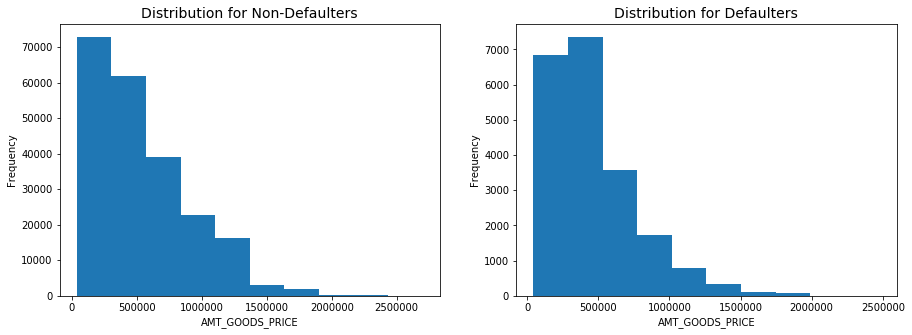

In [118]:
analysis2('AMT_GOODS_PRICE')

Inference:For amount of goods ranging from 0-1000000, proportion of defaulters is more as compared to non defaulters

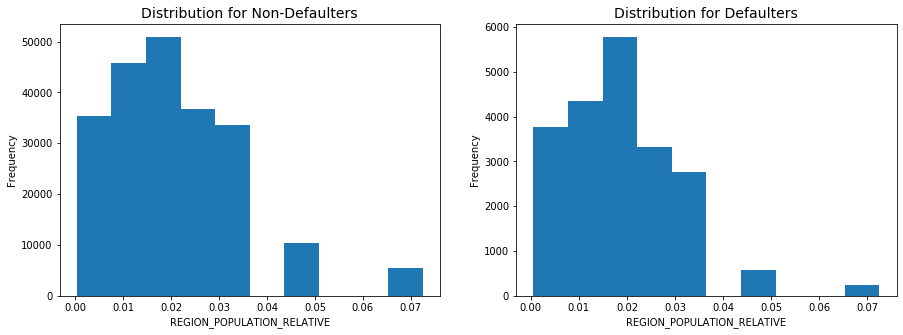

In [119]:
analysis2('REGION_POPULATION_RELATIVE')

Inference: People who live in high density areas are less likely to default even though there is no direct relation.

In [121]:
#Let's check for gender

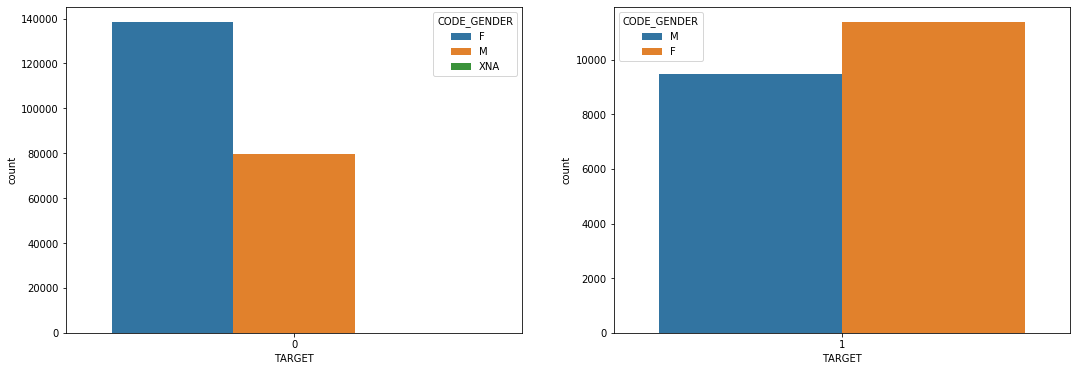

In [122]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=adata_t0)
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=adata_t1)
plt.show()

Inference: Females have a slightly higher proportion in being non defaulters as in being defaulters.

In [124]:
#BIvariate Analysis

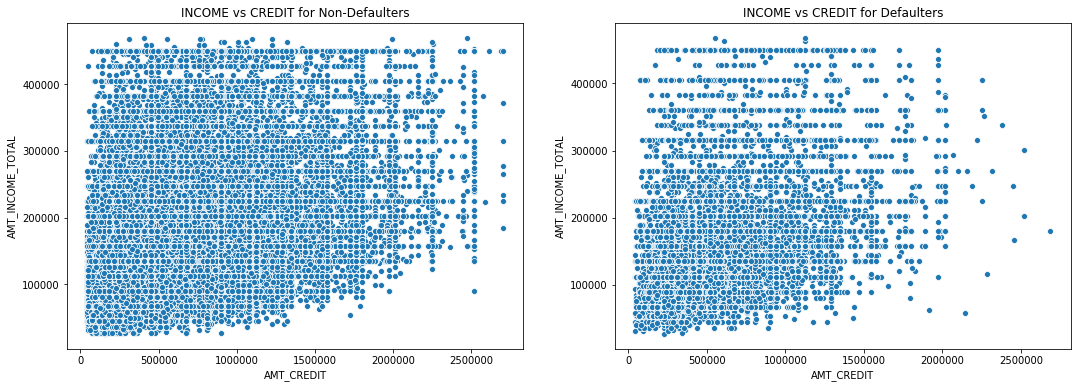

In [125]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=adata_t0)
plt.title('INCOME vs CREDIT for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=adata_t1)
plt.title('INCOME vs CREDIT for Defaulters')
plt.show()

Inference:As can be seen from the plots, people whose income is lower than 300000 or who have credit amount lesser than 1500000 are more prone to be defaulters as they don't have financial space to repay

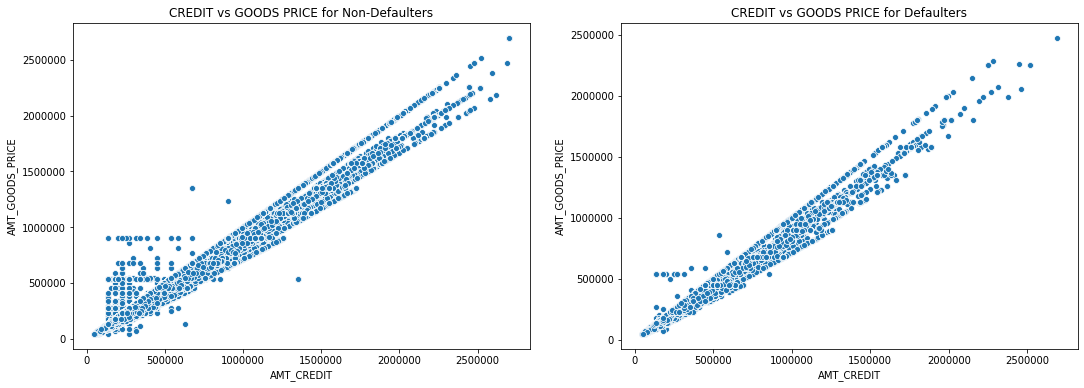

In [126]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=adata_t0)
plt.title('CREDIT vs GOODS PRICE for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=adata_t1)
plt.title('CREDIT vs GOODS PRICE for Defaulters')
plt.show()

Inference: Almost identical pattern for both defaulters and non defaulters.

In [127]:
## this analysis was for the application data.
## now we will first clean the previous application data and then do some analysis on that.

In [128]:
pdata.shape

(1670214, 37)

In [129]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [130]:
#as we did with the application data, we will handle the missing values with the previous application data

In [131]:
(100*pdata.isnull().sum()/len(pdata)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [132]:
pdata = pdata.loc[:, pdata.isnull().mean() <= .50]

In [133]:
(100*pdata.isnull().sum()/len(pdata)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

In [136]:
#we can see that we have removed some columns(4) which had more than 50% of theiur values missing

In [137]:
pdata.shape

(1670214, 33)

In [138]:
pdata.dtypes.value_counts()

object     16
float64    11
int64       6
dtype: int64

In [139]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [140]:
#Now comes the difficult part of merging the previous application data with the present application data

In [142]:
Combined = pd.merge(adata, pdata, how='left', on=['SK_ID_CURR'])

In [144]:
Combined.shape

(1092317, 116)

In [145]:
Combined.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object', length=116)

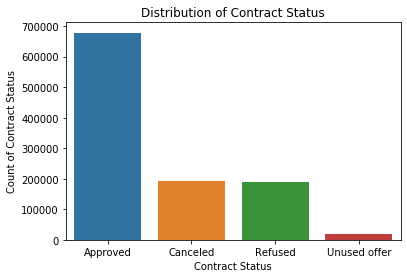

In [146]:
sns.countplot(Combined.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [147]:
#Let's divide the merged data into the above mentioned 4 parts:

In [148]:
approved=Combined[Combined.NAME_CONTRACT_STATUS=='Approved']
refused=Combined[Combined.NAME_CONTRACT_STATUS=='Refused']
canceled=Combined[Combined.NAME_CONTRACT_STATUS=='Canceled']
unused=Combined[Combined.NAME_CONTRACT_STATUS=='Unused Offer']

In [152]:
def plot_merged(var):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

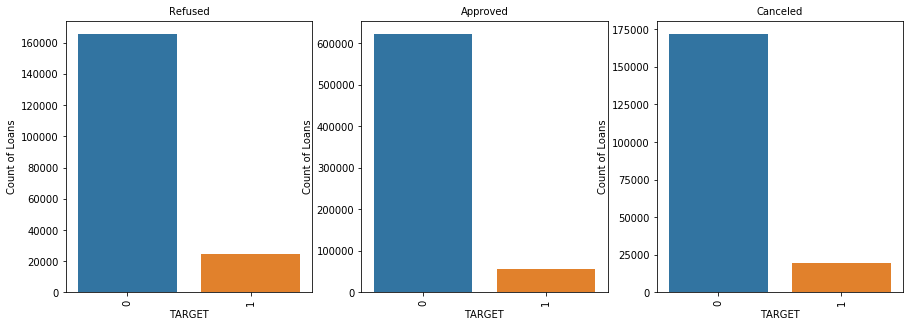

In [153]:
plot_merged('TARGET')

Inference: Loans which were previously refused or cancelled have a higher default rate

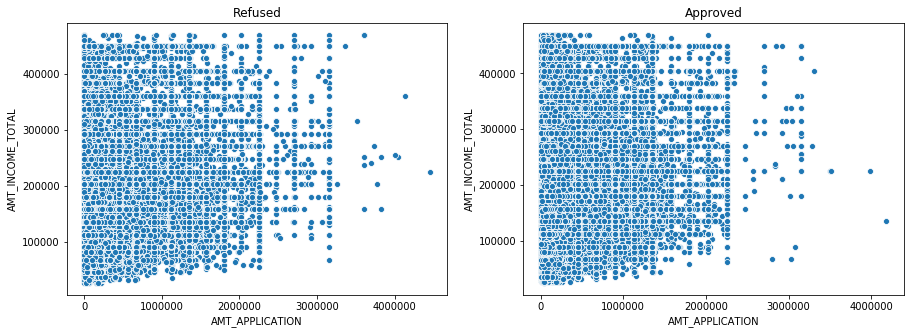

In [154]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=refused)
plt.title('Refused')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=approved)
plt.title('Approved')
plt.show()

Inference: Loans higher than 200k had a higher rejection rate. Also loan rejection rate was much lower if the income was higher than 500k.